In [1]:
from transformers import GPT2LMHeadModel

/root/miniconda3/envs/ankit2/lib/python3.11/site-packages/transformers/utils/generic.py:481: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/root/miniconda3/envs/ankit2/lib/python3.11/site-packages/transformers/utils/generic.py:338: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/root/miniconda3/envs/ankit2/lib/python3.11/site-packages/transformers/utils/generic.py:338: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") # this is 124M parameters, for larger models, you can use "gpt2-medium", "gpt2-large", "gpt2-xl"
sd_hf = model_hf.state_dict() # state dict is a dictionary of the weights of the model ( raw tensors )

for k,v in sd_hf.items(): # print the shapes of the weights in the model (k is the name of the weight, v is the weight itself)
    print(k,"-->",v.shape)

transformer.wte.weight --> torch.Size([50257, 768])
transformer.wpe.weight --> torch.Size([1024, 768])
transformer.h.0.ln_1.weight --> torch.Size([768])
transformer.h.0.ln_1.bias --> torch.Size([768])
transformer.h.0.attn.c_attn.weight --> torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias --> torch.Size([2304])
transformer.h.0.attn.c_proj.weight --> torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias --> torch.Size([768])
transformer.h.0.ln_2.weight --> torch.Size([768])
transformer.h.0.ln_2.bias --> torch.Size([768])
transformer.h.0.mlp.c_fc.weight --> torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias --> torch.Size([3072])
transformer.h.0.mlp.c_proj.weight --> torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias --> torch.Size([768])
transformer.h.1.ln_1.weight --> torch.Size([768])
transformer.h.1.ln_1.bias --> torch.Size([768])
transformer.h.1.attn.c_attn.weight --> torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias --> torch.Size([2304])
transformer.h.1.att

In [3]:
model_hf

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [5]:
sd_hf["transformer.wpe.weight"].view(-1).shape # this is the position embeddings, which are 1024 x 768, so 1024 embeddings of size 768

torch.Size([786432])

In [6]:
sd_hf["transformer.wte.weight"].shape

torch.Size([50257, 768])

In [7]:
sd_hf["transformer.wpe.weight"].view(-1)[:20] # print the first 20 elements of the position embeddings

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

We can plot these weight for wpe (weight position embedding)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
# this is a magic command that allows you to plot directly in the notebook

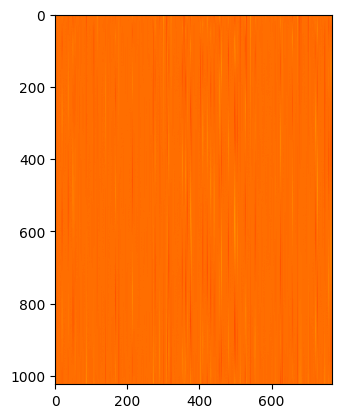

In [9]:
plt.imshow(sd_hf["transformer.wpe.weight"], cmap="hot")

The above plot have some structure, of sin-cos

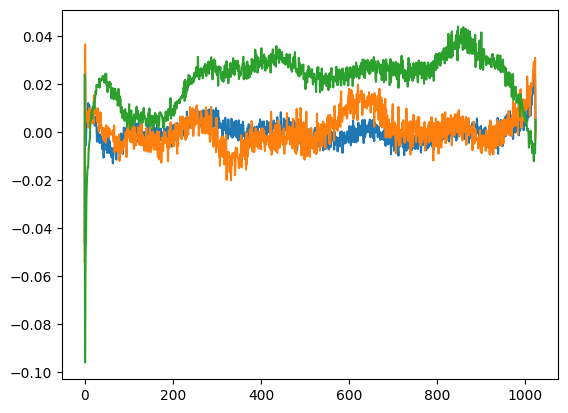

In [10]:
# Let's look into individual column
plt.plot(sd_hf["transformer.wpe.weight"][:,150]) # this is the 150th column of the position embeddings
plt.plot(sd_hf["transformer.wpe.weight"][:,200]) # this is the 200th column of the position embeddings
plt.plot(sd_hf["transformer.wpe.weight"][:,250]) # this is the 250th column of the position embeddings

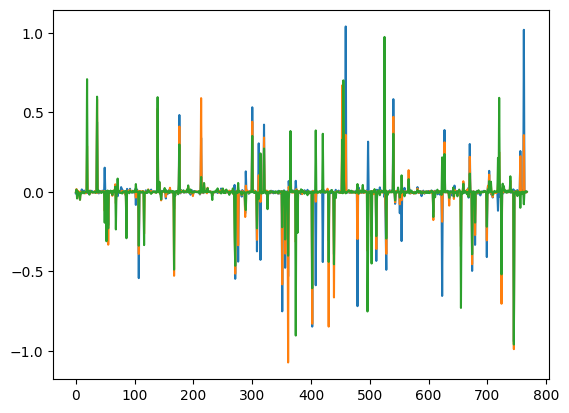

In [20]:
# Let's look into individual row
plt.plot(sd_hf["transformer.wpe.weight"][150,:]) # this is the 150th row of the position embeddings
plt.plot(sd_hf["transformer.wpe.weight"][200,:]) # this is the 200th row of the position embeddings
plt.plot(sd_hf["transformer.wpe.weight"][250,:]) # this is the 250th row of the position embeddings

In [14]:
sd_hf["transformer.h.0.attn.c_attn.weight"].shape # this is the attention weights for the first head of the first layer

torch.Size([768, 2304])

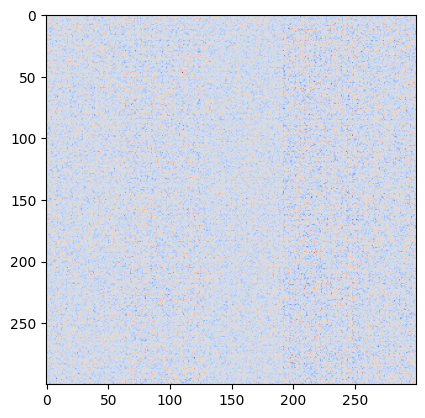

In [11]:
# Let's look at some random weight
plt.imshow(sd_hf["transformer.h.0.attn.c_attn.weight"][:300,:300],cmap="coolwarm")

In [12]:
from transformers import pipeline, set_seed

generator = pipeline('text-generation', model="gpt2")
set_seed(42)
generator("Once upon a time, there was a", max_length=50, num_return_sequences=3)

2024-07-04 17:28:53.549724: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-04 17:28:54.508279: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/root/miniconda3/envs/ankit2/lib/python3.11/site-packages/transformers/utils/generic.py:338: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this st

[{'generated_text': "Once upon a time, there was a time when I realized that being a journalist isn't everything. The writing of this blog is, in fact, my career. I was an occasional writer here in the newsroom when I was writing this piece by"},
 {'generated_text': 'Once upon a time, there was a big, huge black shadow and he flew forward like it was on fire. It was like he was about to be slain. "You do understand I have seen that you must escape, O king. This black'},
 {'generated_text': 'Once upon a time, there was a certain quiet voice talking about God.\n\nHe said, "I\'d like you to tell me that it wasn\'t a prophecy, but something in mine to take me from the land to the sea."\n'}]

In [2]:
with open('input.txt', 'r') as f:
    text = f.read()
data = text[:10000] # first 10000 characters
print(data[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [3]:
len(text)

1115394

In [5]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')

In [7]:
token = enc.encode(text)
len(token)

338025

In [4]:
!wc input.txt

  40000  202651 1115394 input.txt


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [5]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')

In [6]:
enc

<Encoding 'gpt2'>

In [7]:
token = enc.encode(data)
print(token[:24])

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13]


In [8]:
import torch
buf = torch.tensor(token[:24])
buf

tensor([ 5962, 22307,    25,   198,  8421,   356,  5120,   597,  2252,    11,
         3285,   502,  2740,    13,   198,   198,  3237,    25,   198,  5248,
          461,    11,  2740,    13])

In [9]:
x = buf.view(4,6) # this is a 4x6 tensor
x

tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])

Label tensors

In [1]:
buf = torch.tensor(token[:24+1]) # because we need the ground truth for the last token i.e 13
x = buf[:-1].view(4,6) # this is a 4x6 tensor , Input tensor is all but the last token because we need to predict the last token
y = buf[1:].view(4,6) # this is a 4x6 tensor , Label tensor is shifted by 1
print(x)
print(y)

NameError: name 'torch' is not defined

In [9]:
import pandas as pd
import tiktoken

# Load the CSV file
data_path = 'test.csv'  # Modify this path to the location of your CSV file
df = pd.read_csv(data_path)

# Initialize the tokenizer for GPT-2
enc = tiktoken.get_encoding('gpt2')

# Function to count tokens in a single text
def count_tokens(text):
    tokens = enc.encode(text)
    return len(tokens)

# Apply the function to each row in the DataFrame and sum the results
total_tokens = df['Text'].apply(count_tokens).sum()

# Output the total number of tokens
print(f'Total number of tokens in the CSV file: {total_tokens}')


Total number of tokens in the CSV file: 38668


In [6]:
import pandas as pd
import tiktoken

# read parquet file into a pandas dataframe
data_path = 'train_1.parquet'  # Modify this path to the location of your Parquet file
df = pd.read_parquet(data_path)
# df.head()

# save the dataframe to a CSV file
df.to_csv('train_1.csv', index=False)

In [7]:
df.head()

,text,__index_level_0__
0,1. Basics\n\nGenre: Children's Picture Book\nP...,1928189
1,Qualitative Record Management Skills for Effec...,2278658
2,"\n# Rhythm of Us\n\n## I. Basics (Genre, Premi...",1534039
3,"1. Basics (Genre, Premise, Key Takeaways)\nFes...",622131
4,Assessment of Therapy-Related Myeloid Neoplasm...,1701303


In [4]:
df.shape

(240174, 2)

In [5]:
# Initialize the tokenizer for GPT-2
enc = tiktoken.get_encoding('gpt2')

# Function to count tokens in a single text
def count_tokens(text):
    tokens = enc.encode(text)
    return len(tokens)

# Apply the function to each row in the DataFrame and sum the results
total_tokens = df['text'].apply(count_tokens).sum()

# Output the total number of tokens
print(f'Total number of tokens in the CSV file: {total_tokens}')

Total number of tokens in the CSV file: 438807944
